# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier


---
## Step 0: Load The Data

The Training data is downloaded from the following URL
https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip

and stored in the ./dataset folder

Load the data into the local variables


In [403]:
# Load pickled data
import hashlib
import os
import pickle
from urllib.request import urlretrieve

import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import resample
from tqdm import tqdm
from zipfile import ZipFile

print('All modules imported.')

# TODO: Fill this in based on where you saved the training and testing data
training_file   = './dataset/train.p'
validation_file = './dataset/valid.p'
testing_file    = './dataset/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test   = test['features'] , test['labels']
        


All modules imported.


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [404]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = np.array(X_train[0]).shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)
test_sign_classes, test_class_indices, test_class_counts = np.unique(y_test, return_index = True, return_counts = True)

print("Number of training examples =", n_train)
print("Number of testing examples  =", n_validation)
print("Number of testing examples  =", n_test)
print("Image data shape            =", image_shape)
print("Number of classes           =", n_classes)


Number of training examples = 34799
Number of testing examples  = 4410
Number of testing examples  = 12630
Image data shape            = (32, 32)
Number of classes           = 43


### Include an exploratory visualization of the dataset

Randomly pick and display 40 images..



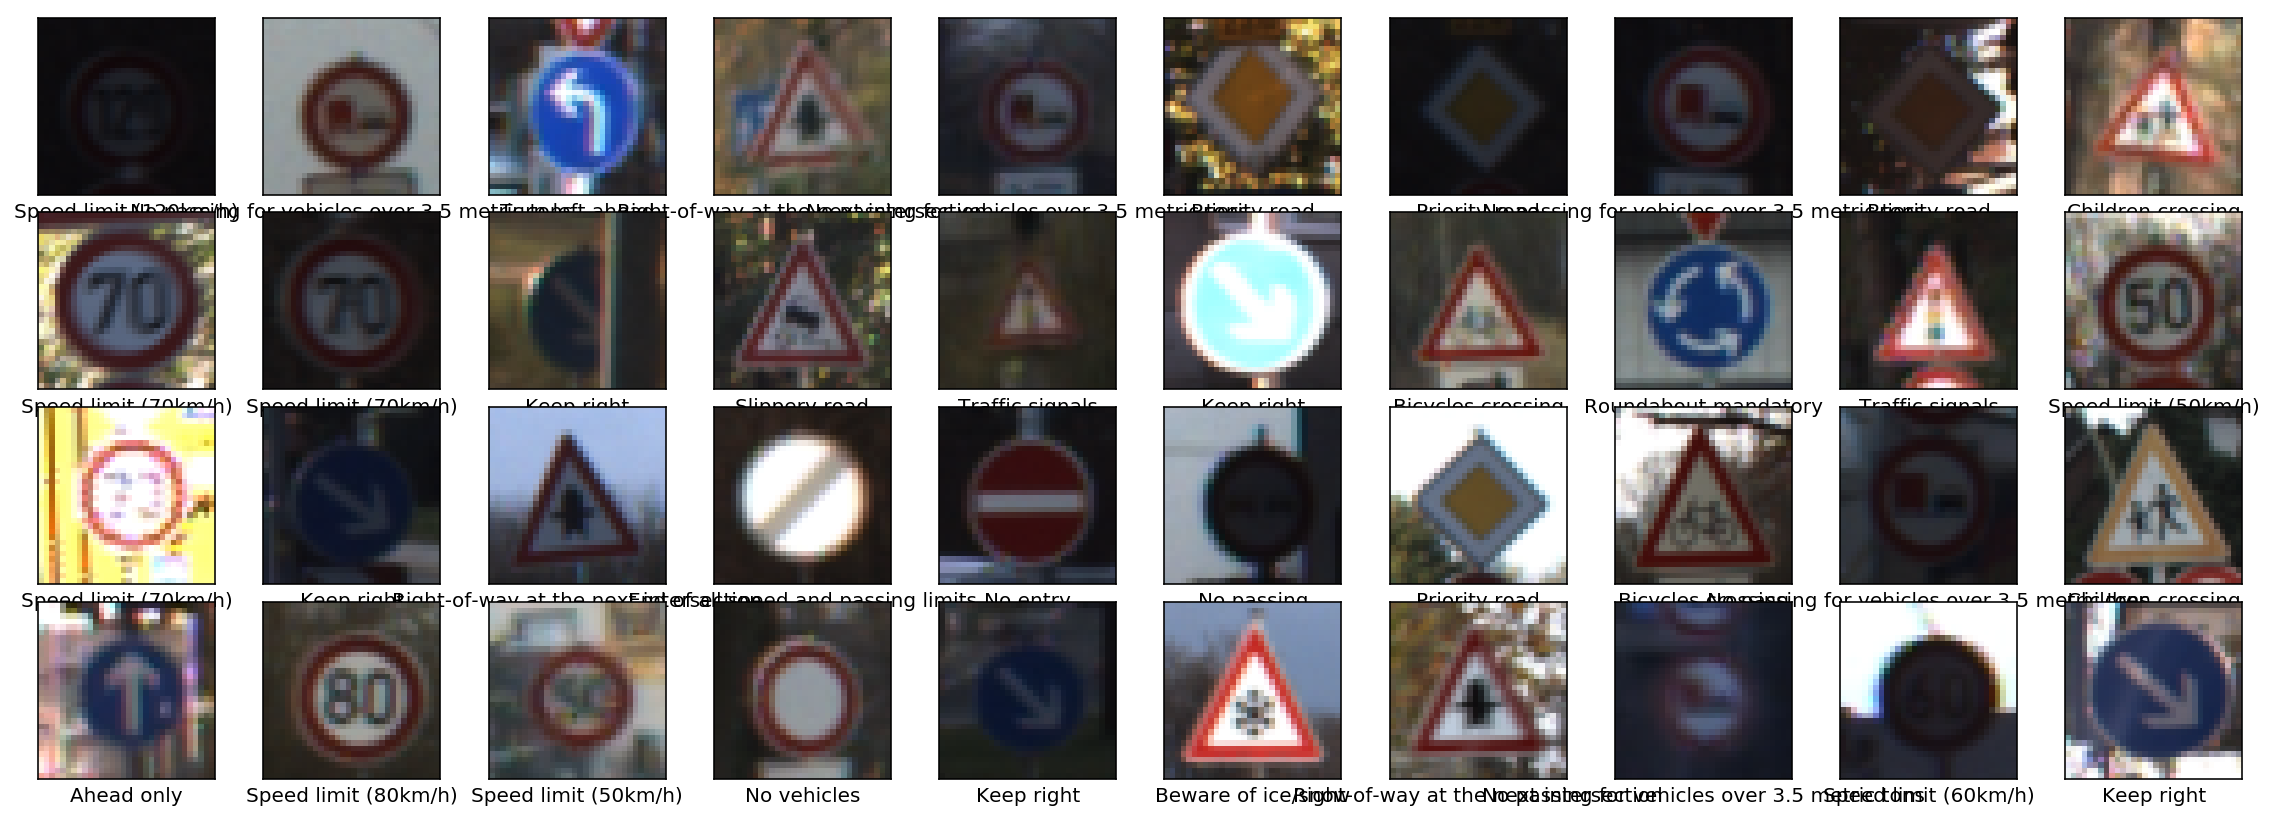

In [405]:
import random
import pandas as pd
df = pd.read_csv('signnames.csv')

def show_images(sample_size, height, width,images, labels, pred=None):
    assert len(images) == len(labels) == sample_size
    
    # Create figure with 4x10 sub-plots.
    fig, axes = plt.subplots(height, width, figsize=(20,7))
    fig.subplots_adjust(hspace=0.1, wspace=0.1)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i]) 

        # Show true and predicted classes.
        if pred is None:
            xlabel = "{0}".format(labels[i])
        else:
            xlabel = "{0} -> {1}".format(labels[i], pred[i])

        ax.set_xlabel(xlabel)
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
indexes = random.sample(range(0, n_train),n_classes)
images = [x_train[index].squeeze() for index in indexes]
labels = [df[df['ClassId']==y_train[index]]['SignName'].item() for index in indexes]

show_images(n_classes,4,10,images, labels)

#### Display the statitics of train and validate dataset in a bar chart 

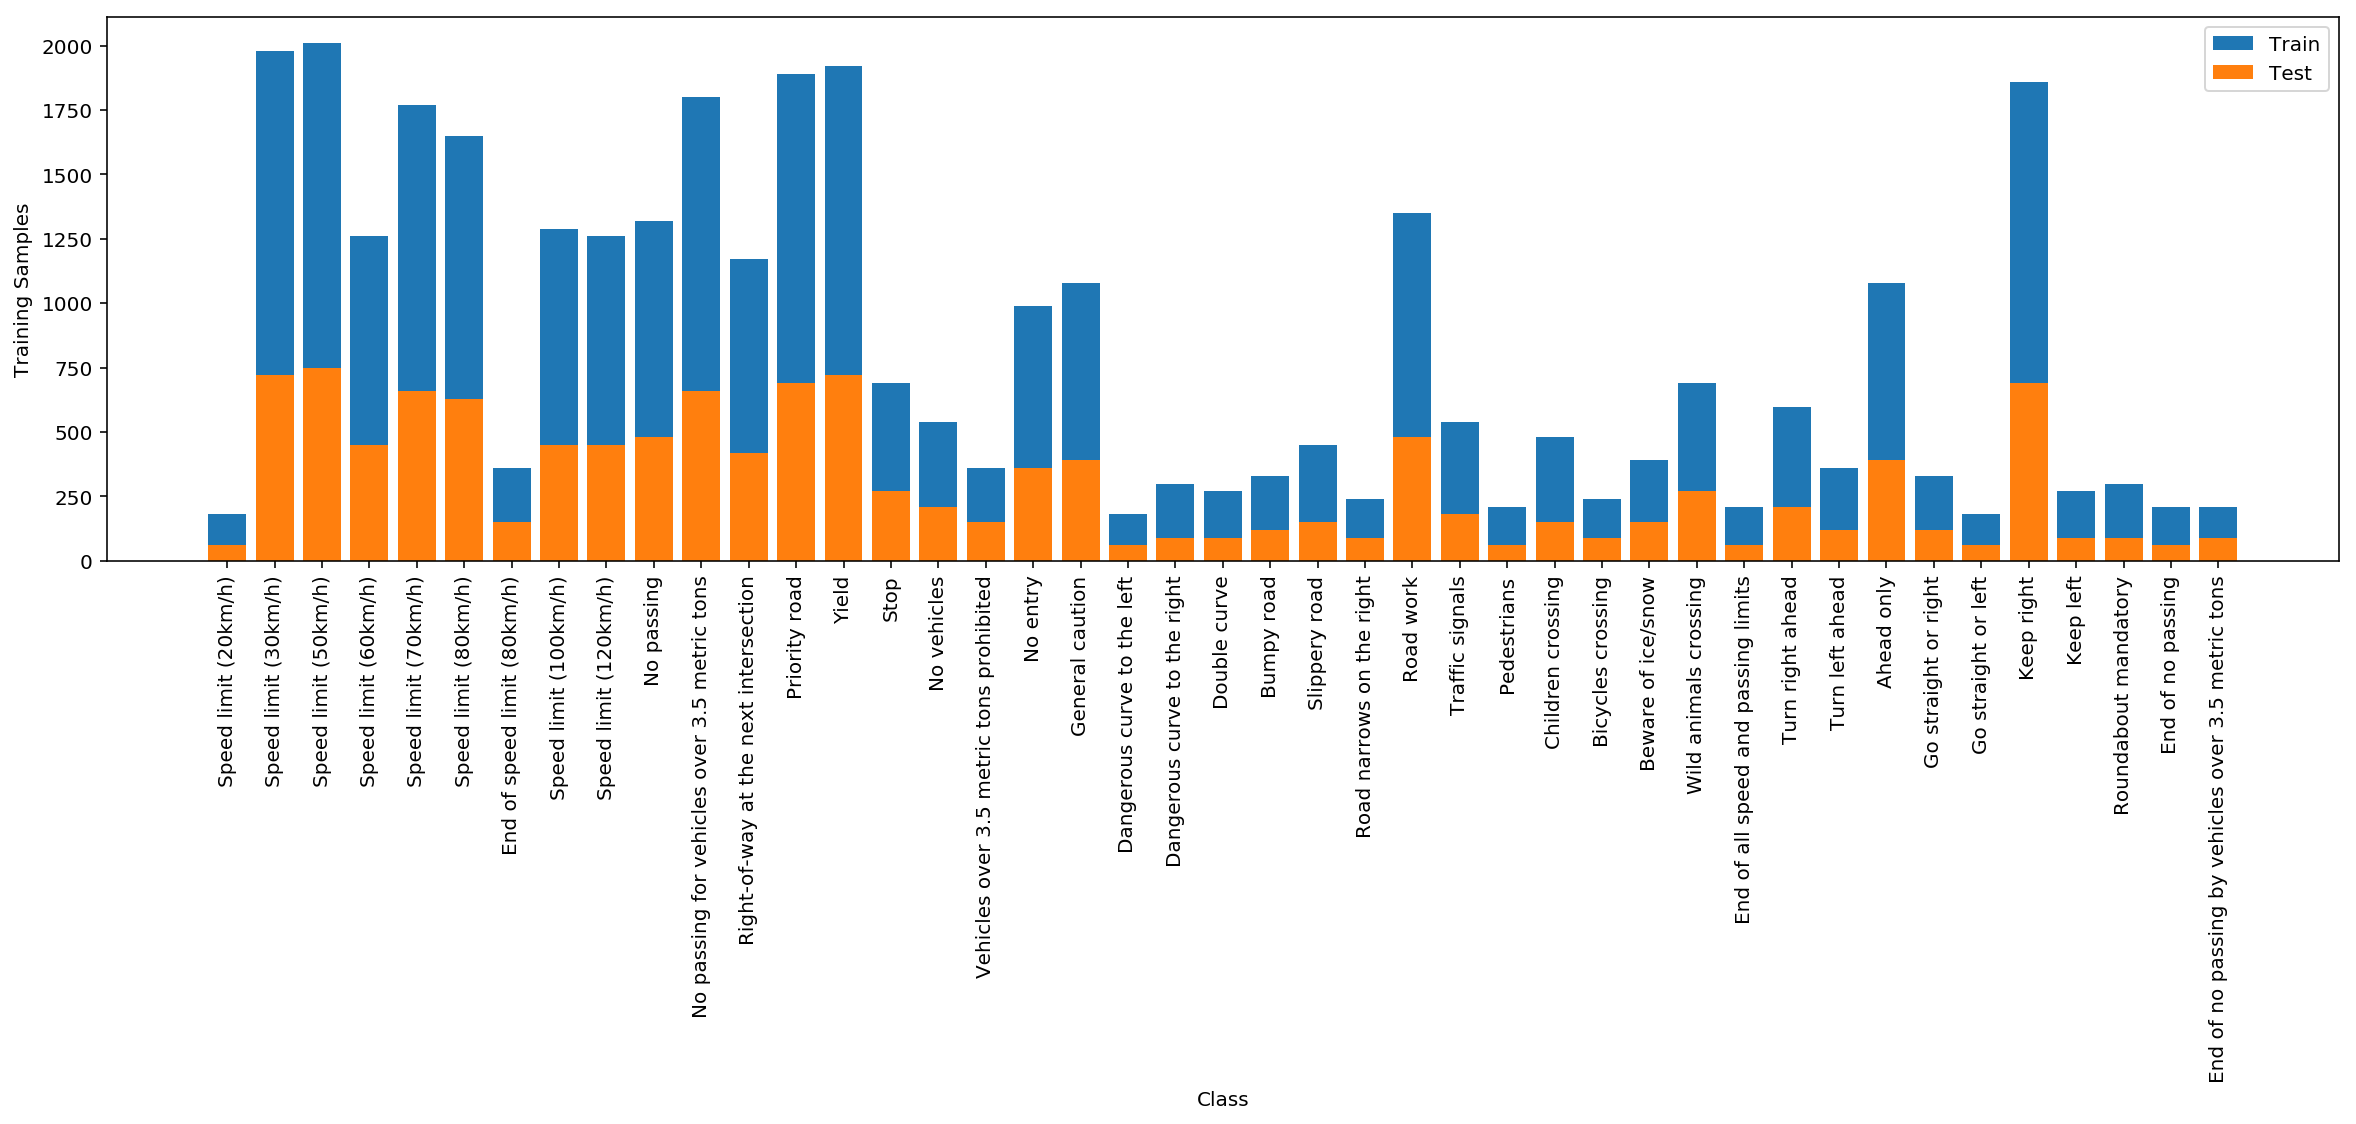

In [406]:
### Data exploration visualization code goes here.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import pandas as pd
df = pd.read_csv('signnames.csv')

plt.figure(figsize=(20,5))
plt.bar( np.arange(n_classes), class_counts, align='center',label='Train')
plt.bar( np.arange(n_classes), test_class_counts, align='center', label='Test')
plt.xlabel('Class')
plt.ylabel('Training Samples')
plt.xticks(np.arange(n_classes), df['SignName'].values, rotation=90)
plt.legend()

plt.show()

plt.savefig('assets/bar_chart.png')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).


### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

The images are converted to grey scale and regularized before the processing.

Display the images before processing.

In [407]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def grayscale(img): 
    img = np.dot(img[...,:3], [0.299, 0.587, 0.114])
    img = img.reshape(img.shape + (1,))
    return img

def normalize_image(img) :
    return ((img-128)/128)


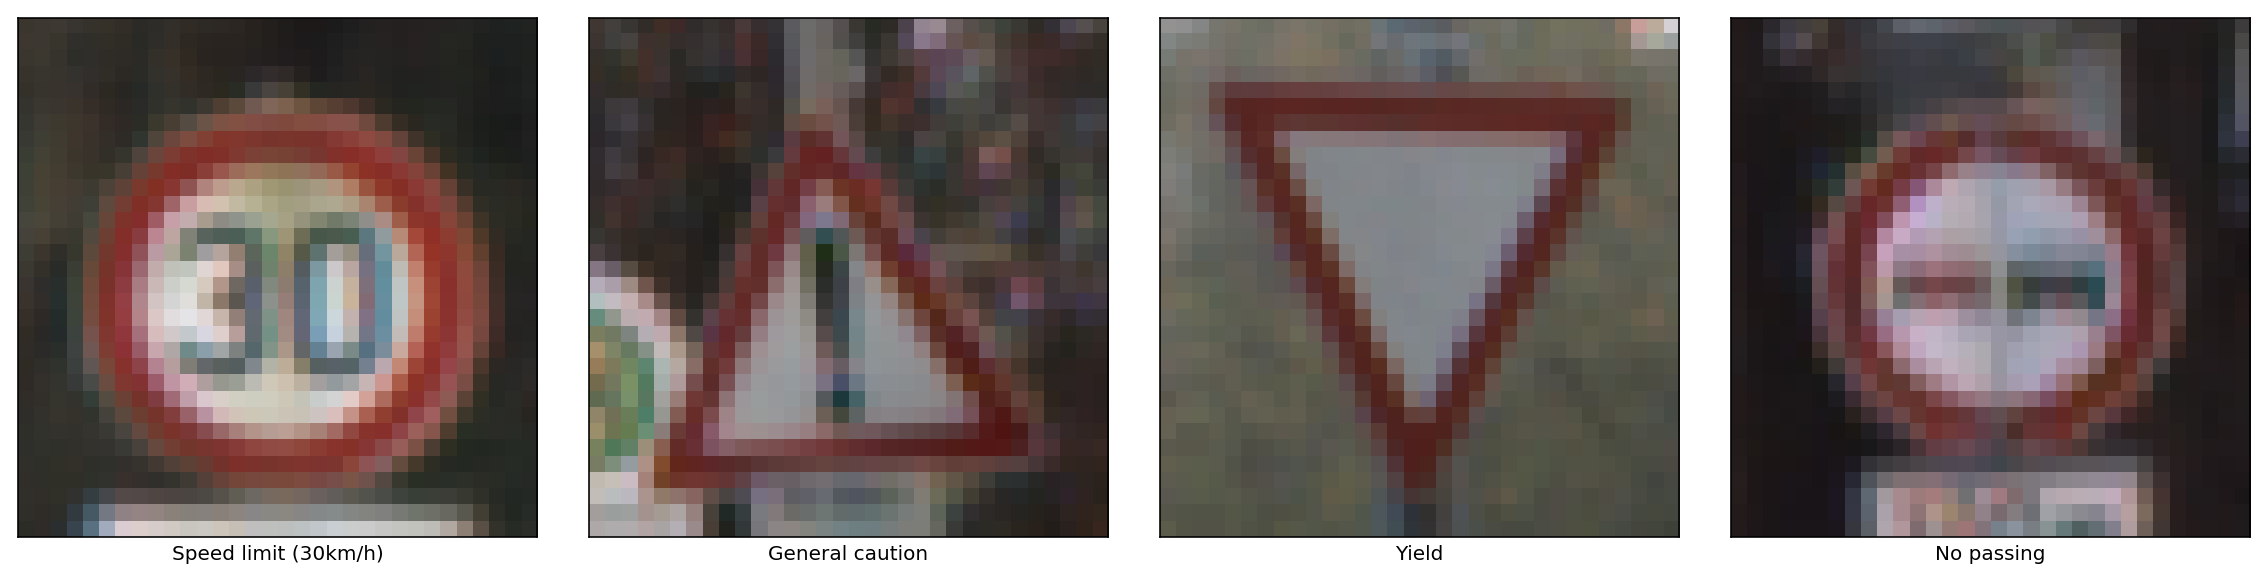

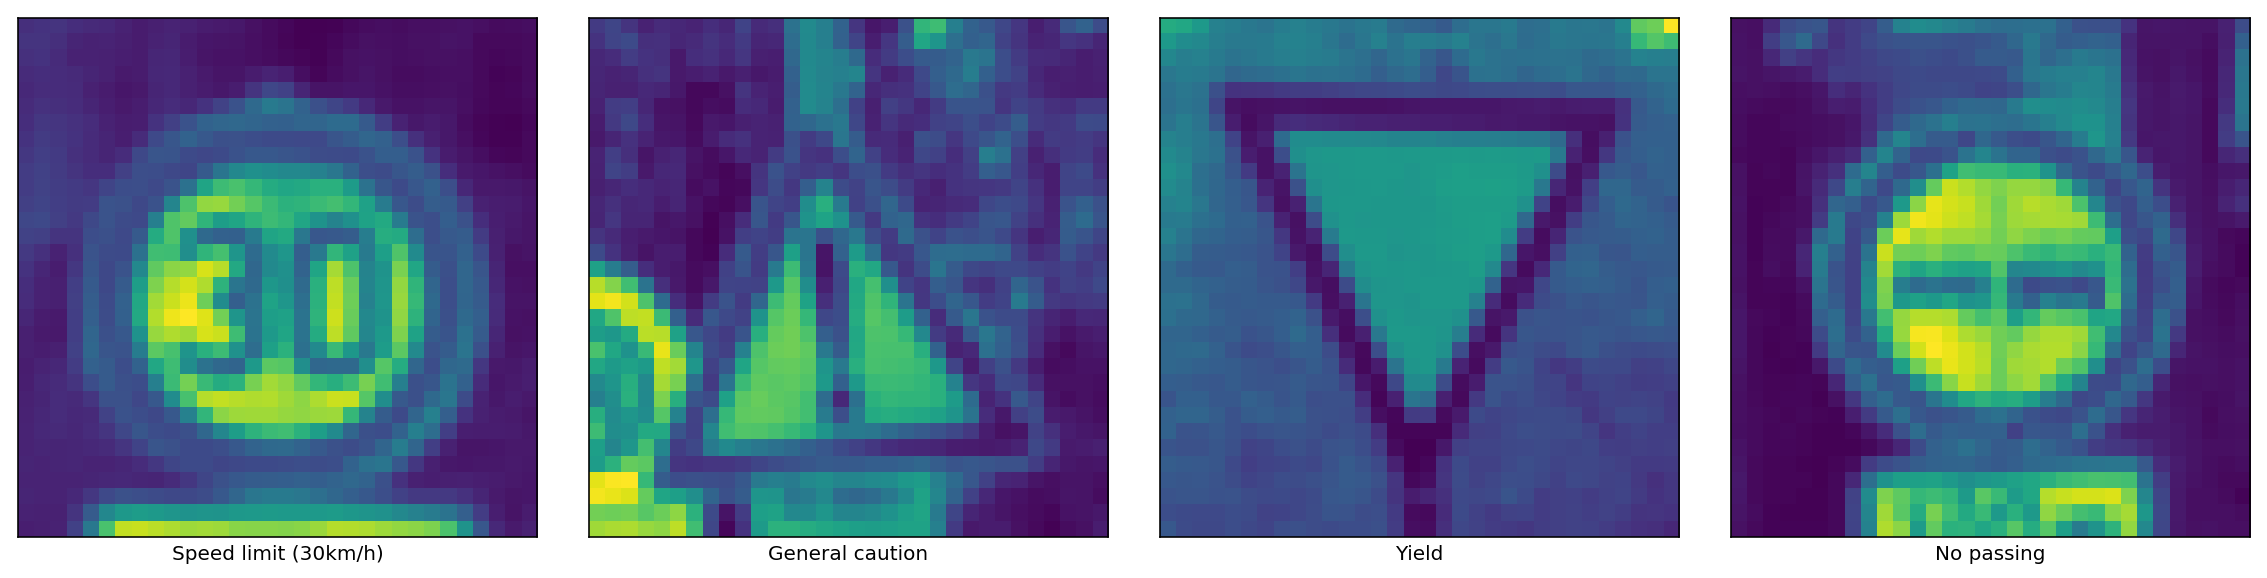

In [410]:
## Print a image before and after greyscaling

indexes = random.sample(range(0, n_train),4)
images = [x_train[index].squeeze() for index in indexes]
labels = [df[df['ClassId']==y_train[index]]['SignName'].item() for index in indexes]

show_images(4,1,4, images, labels)

x_train = normalize_image(grayscale(x_train))
x_valid = normalize_image(grayscale(x_valid))
x_test = normalize_image(grayscale(x_test))

#indexes = random.sample(range(0, n_train),4)
images = [x_train[index].squeeze() for index in indexes]
labels = [df[df['ClassId']==y_train[index]]['SignName'].item() for index in indexes]

show_images(4,1,4, images, labels)

### Model Architecture
This is the standard LeNet code ripped from the class


In [267]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

## LeNet Standard architecture code

import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten

def LeNet(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 32x32x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b
    # Activation.
    conv1 = tf.nn.relu(conv1)
    # pooling. Input = 32x32x32. Output = 16x16x32.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # Layer 2: Convolutional. Output = 16x16x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_b    
    # Activation.
    conv2 = tf.nn.relu(conv2)
    # pooling. Input = 16x16x32. Output = 8x8x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    # Layer 3: Convolutional. Output = 8x8x32.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 32), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(32))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='SAME') + conv3_b    
    # Activation.
    conv3 = tf.nn.relu(conv3)
    # Dropout
    conv3 = tf.nn.dropout(conv3, keep_prob)
    
    # Layer 4: Convolutional. Output = 8x8x32.
    conv4_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 32), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(32))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='SAME') + conv4_b    
    # Activation.
    conv4 = tf.nn.relu(conv4)
    # Dropout
    conv4 = tf.nn.dropout(conv4, keep_prob)    
    
    # Flatten. Input = 8x8x32. Output = 2048.
    fc0   = flatten(conv4)
    
    # Layer 6: Fully Connected. Input = 2048. Output = 128.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(2048, 128), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(128))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 7: Fully Connected. Input = 128. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(128, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b    
    #Activation.
    fc2    = tf.nn.relu(fc2)
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # Layer 8: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    
    return logits


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### Function to display line chart to compare trained accuraries Vs Validation accuracy

In [268]:
def plot_train_valid_accuracies(train_accuracy, valid_accuracy):
    fig, ax = plt.subplots()
    ax.plot(range(len(train_accuracy)), train_accuracy, label="Training Accuracy")
    ax.plot(range(len(valid_accuracy)), valid_accuracy, label="Validation Accuracy")
    
    ax.set_xlabel('Training steps')
    ax.set_ylabel('Accuracy')
    ax.set_title('Training vs. Validation Accuracy')
    ax.legend(loc=4)
    ax.set_ylim([0,1])
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.grid(True)
    plt.show()

#### Function : get_loss_accuracy 
    Get the loss and accuracy for the Trained data 

In [269]:
def get_loss_accuracy ( x, y , keep_prob, training_operation, loss, accuracy, x_data, y_data , kp, batch_size ) :

    num_of_samples = len(x_data)

    sess = tf.get_default_session()
    for offset in range(0, num_of_samples, batch_size) :
        end_offset = offset + batch_size
        batch_x , batch_y = x_data[offset:end_offset], y_data[offset : end_offset]

        data_loss     = 0
        data_accuracy = 0

        _,batch_loss = sess.run([training_operation,loss],
                                        feed_dict={  
                                                     x: batch_x,
                                                     y: batch_y,
                                                     keep_prob: kp
                                                  }
                               )

        batch_accuracy  = sess.run(accuracy,
                                   feed_dict={  
                                                x: batch_x,
                                                y: batch_y,
                                                keep_prob: kp
                                            }
                                  )

        # print('Batch {:>3} -Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(
        #                                         (offset/batch_size),
        #                                         batch_loss,
        #                                         batch_accuracy))

        data_accuracy += (batch_accuracy * num_of_samples)
        data_loss += batch_loss

    return data_loss, (data_accuracy/num_of_samples)



#### Function : get_accuracy

Get the accuracy for the dataset provided

In [270]:
def get_accuracy ( x, y , keep_prob, accuracy, x_data, y_data , batch_size ) :

    num_of_samples = len(x_data)

    sess = tf.get_default_session()
    for offset in range (0, num_of_samples, batch_size) :
        end_offset = offset + batch_size
        batch_x , batch_y = x_data[offset:end_offset], y_data[offset : end_offset]

        data_accuracy = 0

        # Calculate batch loss and accuracy
        batch_accuracy  = sess.run(accuracy,
                                    feed_dict={ 
                                                x : batch_x,
                                                y : batch_y,
                                                keep_prob : 1.0
                                              }
                                  )
        #print('Batch {:>3} - Validation Accuracy: {:.6f}'.format((offset/batch_size),batch_accuracy))
        data_accuracy += (batch_accuracy * num_of_samples)

    return (data_accuracy/num_of_samples)


#### Function : train_model

The Main function which trains based on the train dataset provided and compares it against the validation dataset.

In [271]:
def train_model (x_train, y_train, x_valid, y_valid, learning_rate, kp, batch_size, epochs) :

    # Placeholder for Inputs
    x = tf.placeholder(tf.float32, (None, 32, 32, 1),name='x')
    y = tf.placeholder(tf.int32, (None),name='y')
    one_hot_y = tf.one_hot(y, n_classes)
    keep_prob = tf.placeholder(tf.float32, name='keep_prob')

    # Generate Logits using LeNet 
    logits = LeNet(x, keep_prob)
    # Provide the logits the identifier
    logits = tf.identity(logits, name='logits')

    # Code straight from class
    loss = tf.reduce_mean(\
            tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y))

    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
    training_operation = optimizer.minimize(loss)

    #optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)\
    #            .minimize(loss)

    correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy     = tf.reduce_mean(tf.cast(correct_pred, tf.float32),name='accuracy')

    saver = tf.train.Saver()

    # Launch the graph
    with tf.Session() as sess:
        # Initialize the session
        sess.run(tf.global_variables_initializer())

        # Start Training
        print ('Started the training process ...')
        
        train_accuracy_arr = []
        valid_accuracy_arr = []

        for epoch in range(epochs):

            # Shuffle the dataset duing the each epoch
            # Machines remember the old data very well 
            x_train, y_train = shuffle(x_train,y_train)
            x_valid, y_valid = shuffle(x_valid,y_valid)

            train_loss, train_accuracy = get_loss_accuracy ( x,
                                                             y,
                                                             keep_prob,
                                                             training_operation,
                                                             loss,
                                                             accuracy,
                                                             x_train,
                                                             y_train,
                                                             kp,
                                                             batch_size
                                                           )

            valid_accuracy = get_accuracy ( x, y, keep_prob, accuracy, x_valid, y_valid, batch_size )
            print("EPOCH {}: Training Accuracy = {:.3f} -- Validation Accuracy = {:.3f} -- Loss = {:.3f}"
                             .format(epoch+1, train_accuracy, valid_accuracy, train_loss))
            train_accuracy_arr.append(train_accuracy)
            valid_accuracy_arr.append(valid_accuracy)

        plot_train_valid_accuracies(train_accuracy_arr,valid_accuracy_arr )    
        print ('Completed the training process.')
        saver.save(sess, './model/Model')
        print("Model Saved")



#### Train for the epoch = 10 and save the model


Started the training process ...
EPOCH 1: Training Accuracy = 0.279 -- Validation Accuracy = 0.328 -- Loss = 2.469
EPOCH 2: Training Accuracy = 0.622 -- Validation Accuracy = 0.707 -- Loss = 1.274
EPOCH 3: Training Accuracy = 0.739 -- Validation Accuracy = 0.845 -- Loss = 0.865
EPOCH 4: Training Accuracy = 0.811 -- Validation Accuracy = 0.828 -- Loss = 0.545
EPOCH 5: Training Accuracy = 0.838 -- Validation Accuracy = 0.897 -- Loss = 0.445
EPOCH 6: Training Accuracy = 0.883 -- Validation Accuracy = 0.948 -- Loss = 0.391
EPOCH 7: Training Accuracy = 0.838 -- Validation Accuracy = 0.897 -- Loss = 0.581
EPOCH 8: Training Accuracy = 0.829 -- Validation Accuracy = 0.914 -- Loss = 0.320
EPOCH 9: Training Accuracy = 0.910 -- Validation Accuracy = 0.914 -- Loss = 0.325
EPOCH 10: Training Accuracy = 0.946 -- Validation Accuracy = 0.983 -- Loss = 0.233


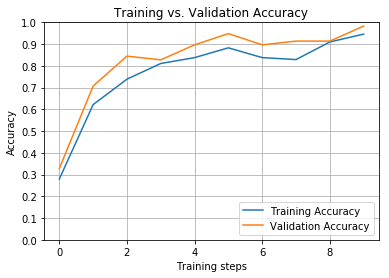

Completed the training process.
Model Saved


In [272]:
### Once a final model architecture is selected, 
epochs = 10
batch_size = 128
learning_rate = 0.001
keep_prob = 0.6

tf.reset_default_graph()
with tf.Graph().as_default():
    train_model (x_train, y_train, x_valid, y_valid, learning_rate, keep_prob,  batch_size, epochs )


#### Train for the epoch = 20 and save the model

Started the training process ...
EPOCH 1: Training Accuracy = 0.261 -- Validation Accuracy = 0.414 -- Loss = 2.713
EPOCH 2: Training Accuracy = 0.532 -- Validation Accuracy = 0.724 -- Loss = 1.602
EPOCH 3: Training Accuracy = 0.694 -- Validation Accuracy = 0.776 -- Loss = 1.297
EPOCH 4: Training Accuracy = 0.829 -- Validation Accuracy = 0.879 -- Loss = 0.726
EPOCH 5: Training Accuracy = 0.847 -- Validation Accuracy = 0.931 -- Loss = 0.517
EPOCH 6: Training Accuracy = 0.847 -- Validation Accuracy = 0.948 -- Loss = 0.464
EPOCH 7: Training Accuracy = 0.874 -- Validation Accuracy = 0.931 -- Loss = 0.387
EPOCH 8: Training Accuracy = 0.874 -- Validation Accuracy = 0.983 -- Loss = 0.328
EPOCH 9: Training Accuracy = 0.928 -- Validation Accuracy = 0.983 -- Loss = 0.297
EPOCH 10: Training Accuracy = 0.946 -- Validation Accuracy = 0.966 -- Loss = 0.225
EPOCH 11: Training Accuracy = 0.928 -- Validation Accuracy = 0.914 -- Loss = 0.159
EPOCH 12: Training Accuracy = 0.919 -- Validation Accuracy = 1.

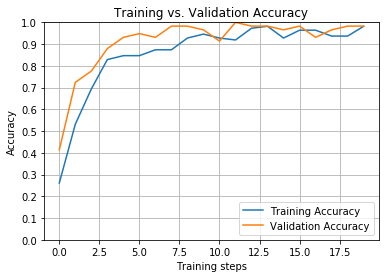

Completed the training process.
Model Saved


In [273]:
epochs = 20
batch_size = 128
learning_rate = 0.001
keep_prob = 0.6

tf.reset_default_graph()
with tf.Graph().as_default():
    train_model (x_train, y_train, x_valid, y_valid, learning_rate, keep_prob,  batch_size, epochs )


### Test the Model with the Test Data

In [290]:
### Load the images and plot them here.

import tensorflow as tf

def test_accuracy(save_model_path, x_test, y_test, batch_size):
        
    loaded_graph = tf.Graph()
    
    with tf.Session(graph=loaded_graph) as sess:
        # load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')    
        loader.restore(sess, save_model_path)
        
        # Get tensors from loaded model
        loaded_x         = loaded_graph.get_tensor_by_name('x:0')
        loaded_y         = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits    = loaded_graph.get_tensor_by_name('logits:0')
        loaded_accuracy  = loaded_graph.get_tensor_by_name('accuracy:0')
        
        test_accuracy = get_accuracy(loaded_x,
                                     loaded_y, 
                                     loaded_keep_prob,
                                     loaded_accuracy, 
                                     x_test, 
                                     y_test, 
                                     batch_size
                                    )
        
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        

In [291]:
batch_size = 128
save_model_path = './model/Model'
print ('where')
test_accuracy(save_model_path, x_test, y_test, batch_size)

where
INFO:tensorflow:Restoring parameters from ./model/Model
Test Accuracy = 0.953


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [383]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io
import os

def show_images(images,n):
    assert len(images) <= 10   
    fig, axes = plt.subplots(1, n, figsize=(13,5))
    fig.subplots_adjust(hspace=0.1, wspace=0.1)

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i]) 
        ax.set_title(i+1)     


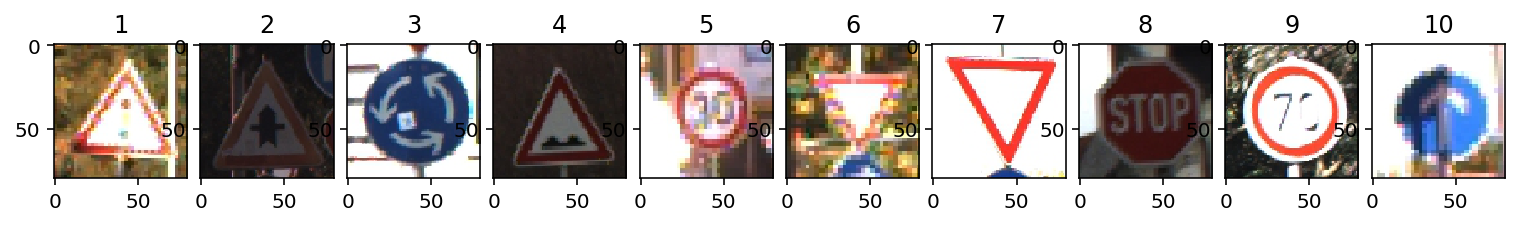

In [384]:

imgs = [ Image.open('test_images/{}.jpg'.format(i)) for i in range(10) ]
show_images(imgs,10)

x_test_random = np.zeros([10, 32, 32, 3], dtype = np.int32)

for i in range(10) :
    img = Image.open('test_images/{}.jpg'.format(i))
    img = img.resize((32,32), Image.ANTIALIAS)
    x_test_random[i] = img;


### Analyze Performance

In [385]:
#### Preprocess the images
x_test_random = normalize_image(grayscale(x_test_random))


In [386]:
### Calculate the accuracy for these 10 new images. 

save_model_path = './model/Model'
top_n = 5
loaded_graph = tf.Graph()

with tf.Session(graph=loaded_graph) as sess:
    
    # load model
    loader = tf.train.import_meta_graph(save_model_path + '.meta')    
    loader.restore(sess, save_model_path)
    
    # Get tensors from loaded model
    loaded_x         = loaded_graph.get_tensor_by_name('x:0')
    loaded_y         = loaded_graph.get_tensor_by_name('y:0')
    loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
    loaded_logits    = loaded_graph.get_tensor_by_name('logits:0')
    loaded_acc       = loaded_graph.get_tensor_by_name('accuracy:0')
    
    test_predictions = sess.run(tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n),
                            feed_dict={loaded_x:x_test_random ,  loaded_keep_prob: 1.0})


INFO:tensorflow:Restoring parameters from ./model/Model


In [387]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

print(test_predictions)



TopKV2(values=array([[  9.04998720e-01,   9.49558616e-02,   2.60358102e-05,
          1.11831359e-05,   3.78865252e-06],
       [  9.99924421e-01,   5.87701834e-05,   1.40692691e-05,
          2.74292051e-06,   2.10873150e-08],
       [  8.26202333e-01,   1.34747699e-01,   3.70472968e-02,
          9.49251757e-04,   4.25469363e-04],
       [  9.99919176e-01,   8.01525894e-05,   7.23479047e-07,
          3.85858412e-09,   2.44011344e-09],
       [  9.99873161e-01,   1.09158223e-04,   1.24120879e-05,
          4.90452521e-06,   3.61278694e-07],
       [  9.99990225e-01,   5.39523899e-06,   1.78858409e-06,
          8.59460329e-07,   5.45307842e-07],
       [  1.00000000e+00,   1.71468585e-16,   2.71270315e-19,
          4.91848119e-20,   4.86798957e-20],
       [  9.99995470e-01,   4.30782848e-06,   9.08133870e-08,
          4.77712980e-08,   2.17972058e-08],
       [  1.00000000e+00,   2.31096529e-08,   7.45530304e-09,
          1.32199141e-10,   2.62091000e-12],
       [  9.99999523e-0

### Show the predicted Output

#### Note : This part of the code (Showing Softmax Predictions) is taken from forum

In [388]:
import pandas as pd
df = pd.read_csv('signnames.csv')

def show_predicted_output(imgs, predictions, df):
    
    fig, axies = plt.subplots(nrows=10, ncols=2, figsize=(15,14))
    #fig.tight_layout()
    fig.suptitle('Softmax Predictions', fontsize=20, y=0.95)
    fig.subplots_adjust(hspace=0.4, wspace=0.1)

    n_predictions = 5
    margin = 0.05
    ind = np.arange(n_predictions)
    width = (1. - 2. * margin) / n_predictions

    for i, (img, pred_indicies, pred_values) in enumerate(zip(imgs, predictions.indices, predictions.values)):
        pred_names = [df[df['ClassId']==pred_i]['SignName'].item() for pred_i in pred_indicies]

        axies[i][0].imshow(img.reshape(32,32), cmap='gray')
        #axies[i][0].set_title(correct_name)
        axies[i][0].set_axis_off()

        axies[i][1].barh(ind + margin, pred_values[::-1], width)
        axies[i][1].set_yticks(ind + margin)
        axies[i][1].set_yticklabels(pred_names[::-1])
        axies[i][1].set_xticks([0, 0.5, 1.0])

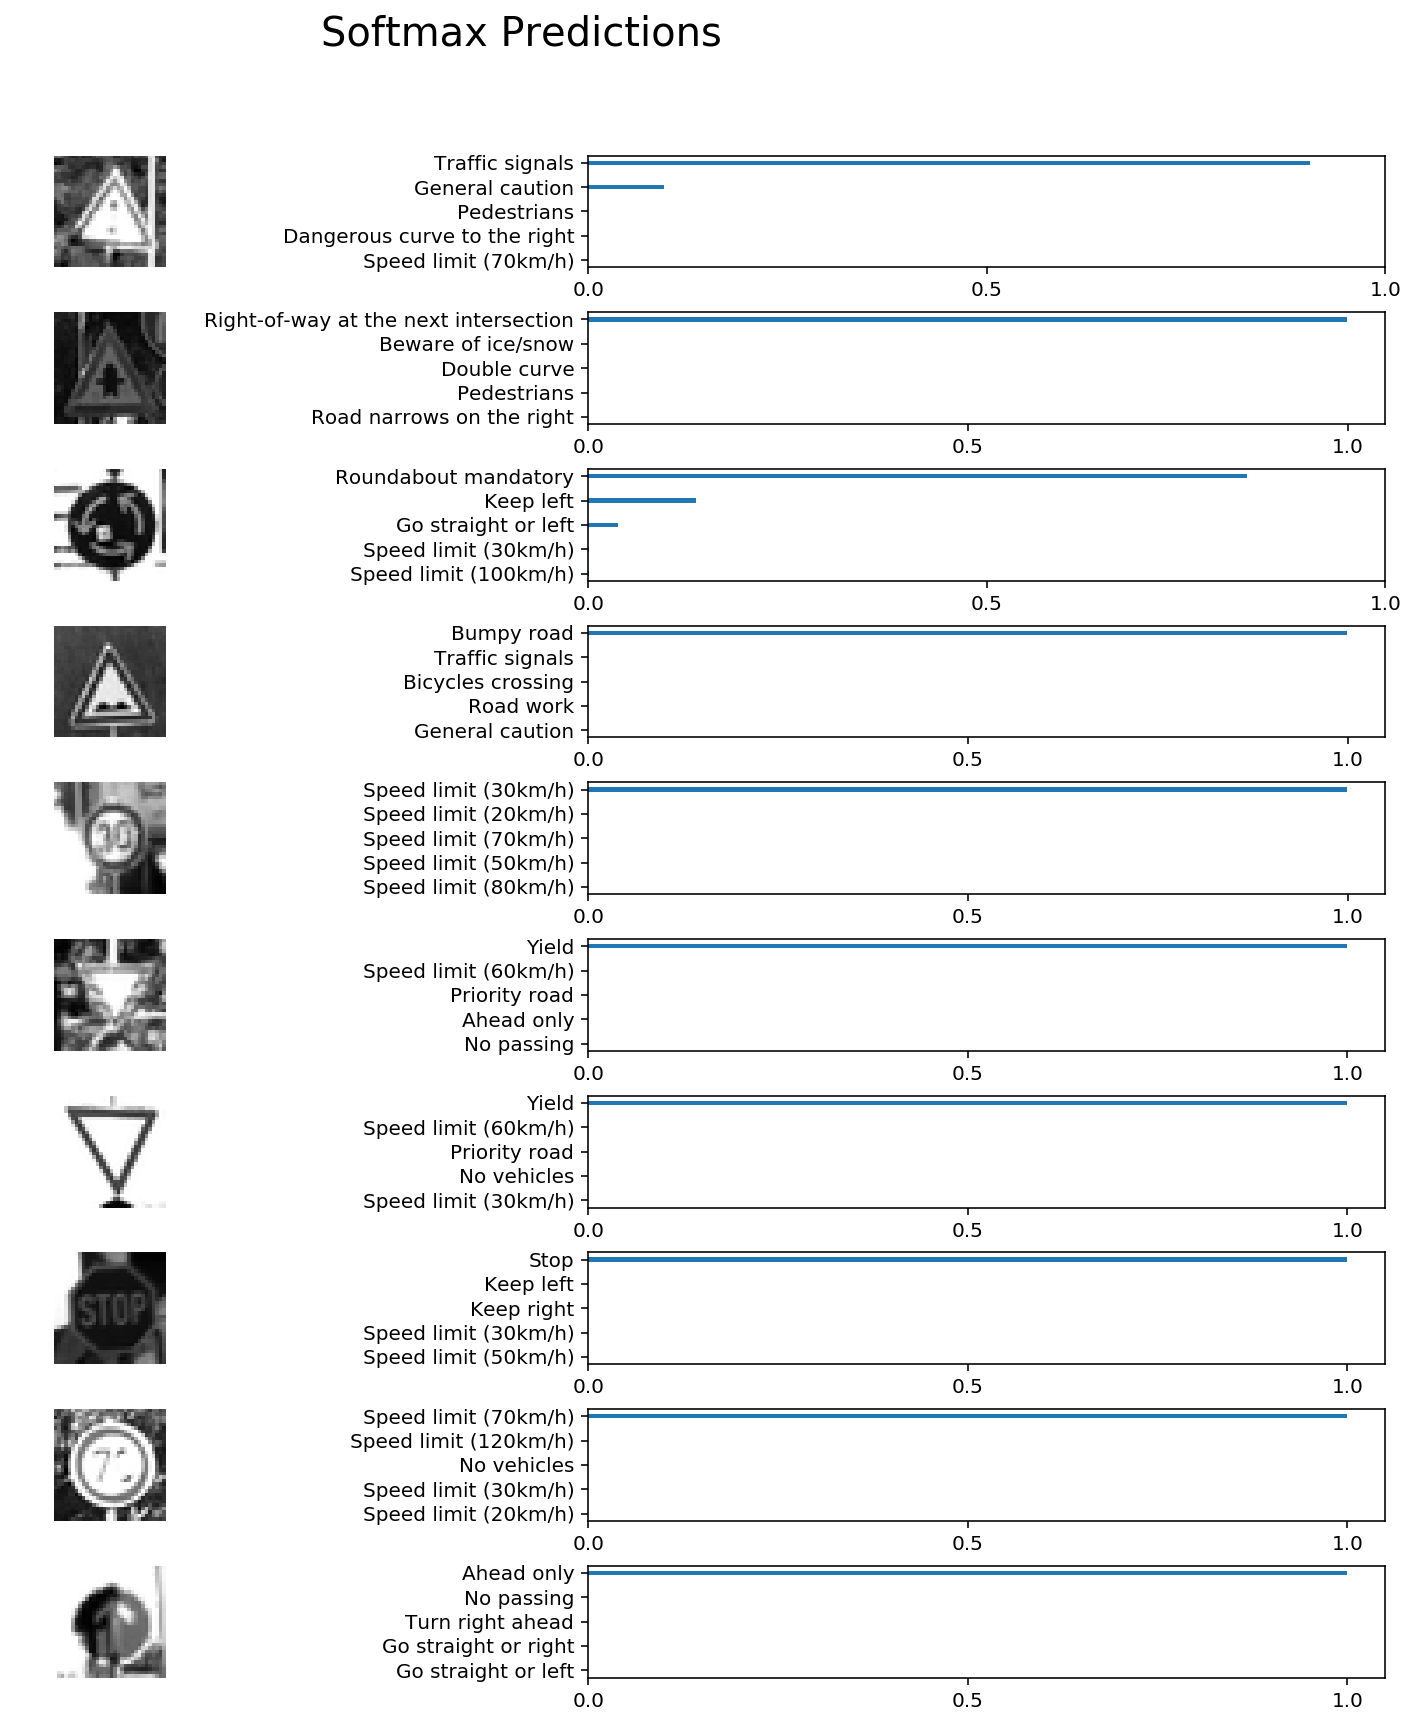

In [389]:
show_predicted_output(x_test_random ,test_predictions,df)


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")